# BiArchetype Analysis

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from archetypes.datasets import make_archetypal_dataset
import numpy as np


n_archetypes = (3, 3)

rng = np.random.default_rng(5)
archetypes = rng.uniform(size=n_archetypes)

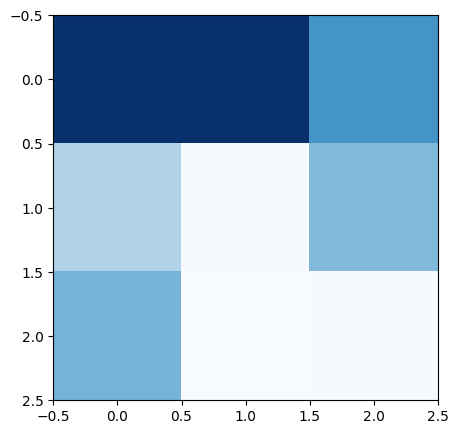

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.imshow(archetypes, cmap="Blues")
plt.show()

In [10]:
X, labels = make_archetypal_dataset(
    shape=(500, 500),
    alpha=0.4,
    archetypes=archetypes,
    noise=0.01,
)

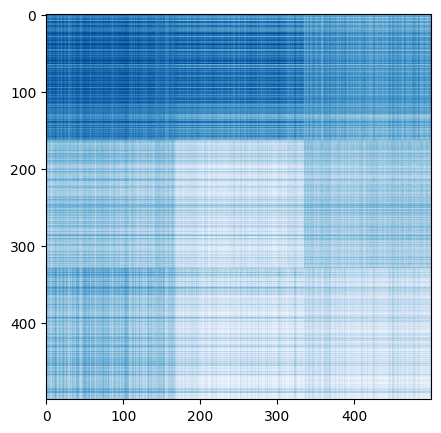

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.imshow(X, cmap="Blues")
plt.show()

In [12]:
from archetypes.sklearn import BiAA

method_kwargs = {"optimizer": "sgd", "optimizer_kwargs": {"learning_rate": 1e-2}}

model = BiAA(
    n_archetypes=n_archetypes,
    max_iter=2000,
    tol=1e-3,
    random_state=25,
    method="jax",
    method_kwargs=method_kwargs,
    init="uniform",
)
model.fit(X)

BiAA(init_kwargs={}, max_iter=2000, method='jax',
     method_kwargs={'optimizer': 'sgd',
                    'optimizer_kwargs': {'learning_rate': 0.01}},
     n_archetypes=(3, 3), random_state=RandomState(MT19937) at 0x253A5B23840,
     tol=0.001)

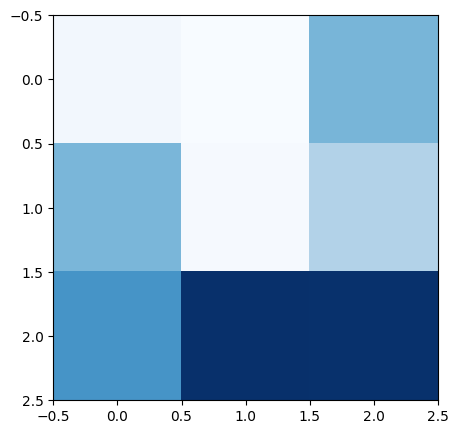

In [13]:
plt.figure(figsize=(5, 5))
plt.imshow(model.archetypes_, cmap="Blues")
plt.show()

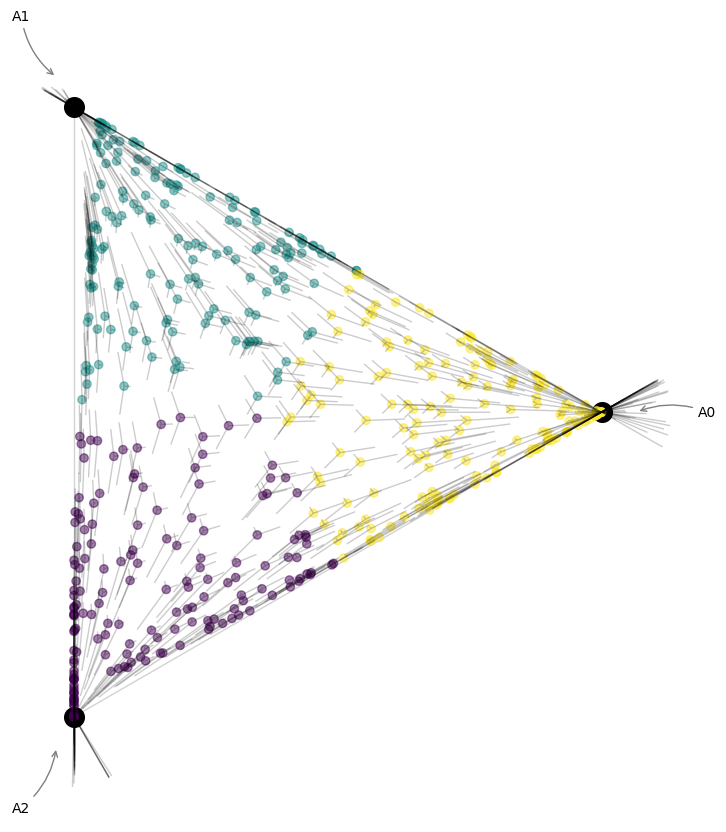

In [14]:
import matplotlib.pyplot as plt
from archetypes.visualization import simplex

plt.figure(figsize=(10, 10))
simplex(
    model.similarity_degree_[0],
    c=labels[0],
    alpha=0.5,
    show_circle=False,
    show_direction=True,
)

plt.show()

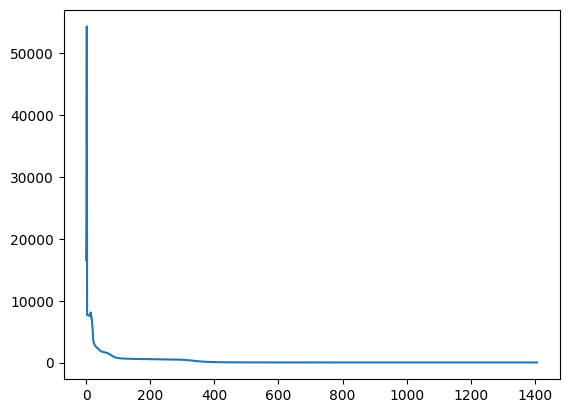

In [15]:
plt.plot(model.loss_)